## Cross-Country Comparison
Objective: Synthesize the cleaned datasets from Benin, Sierra Leone, and Togo to identify relative solar potential and key differences across countries.

### Import All Essential libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### Load each country’s cleaned CSV

In [7]:
benin_df = pd.read_csv('../data/benin_clean.csv')
sierraleone_df = pd.read_csv('../data/sierraleone_clean.csv')
togo_df = pd.read_csv('../data/togo_clean.csv')

### Metric Comparison

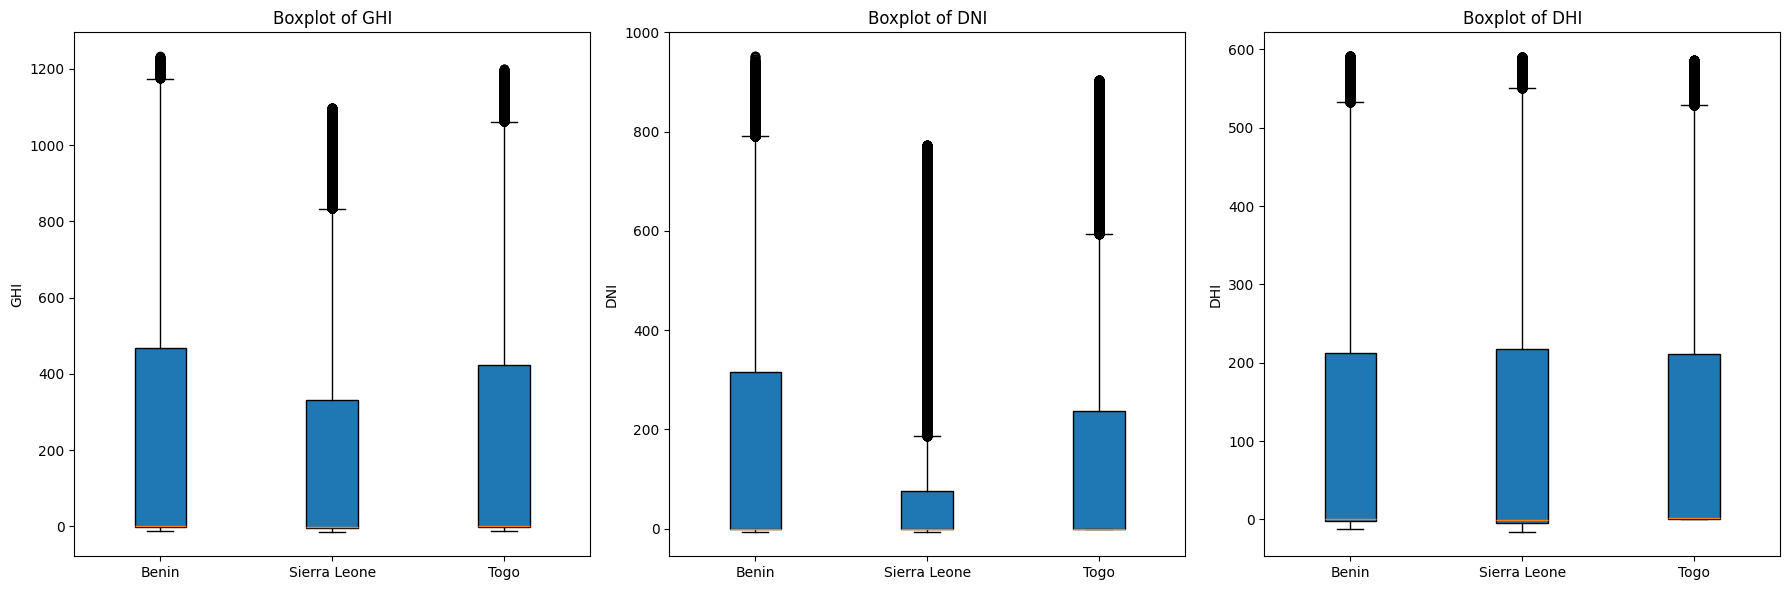

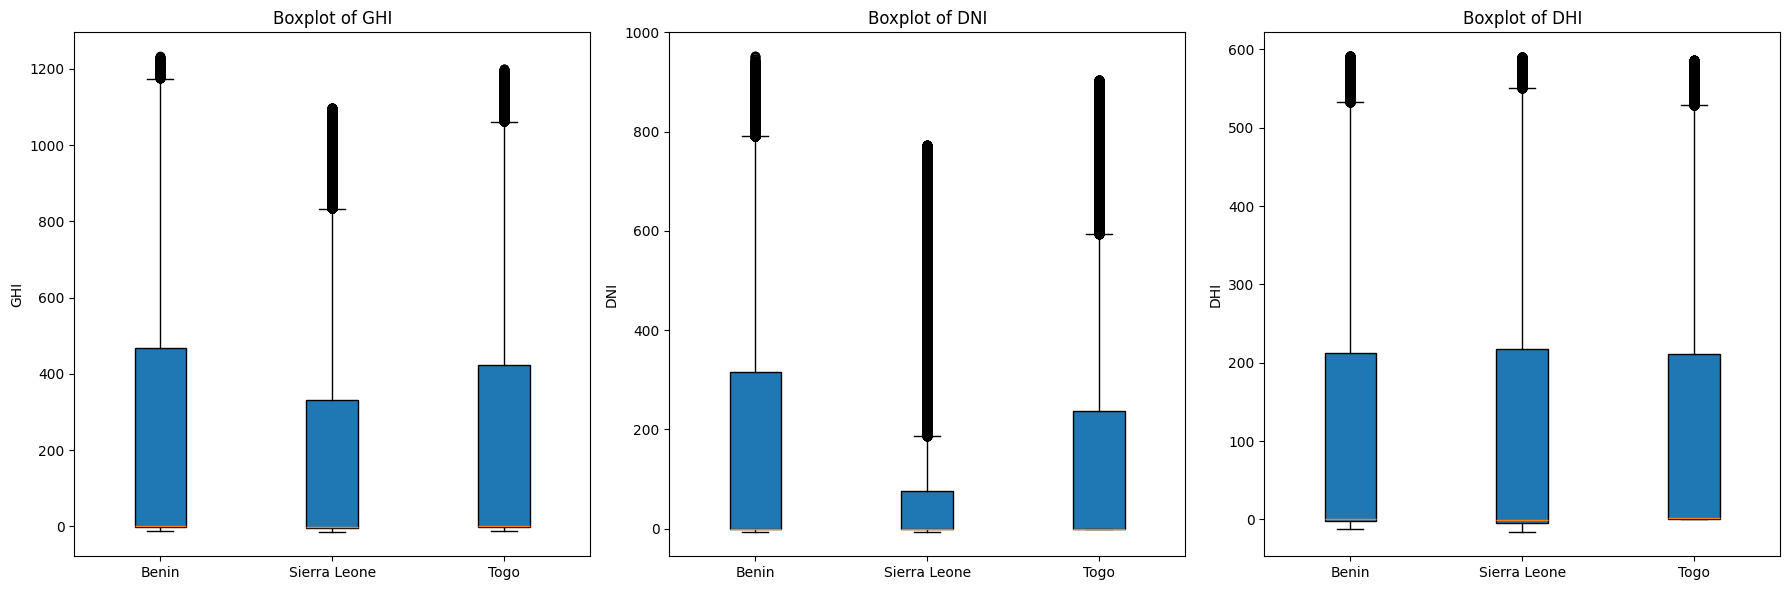

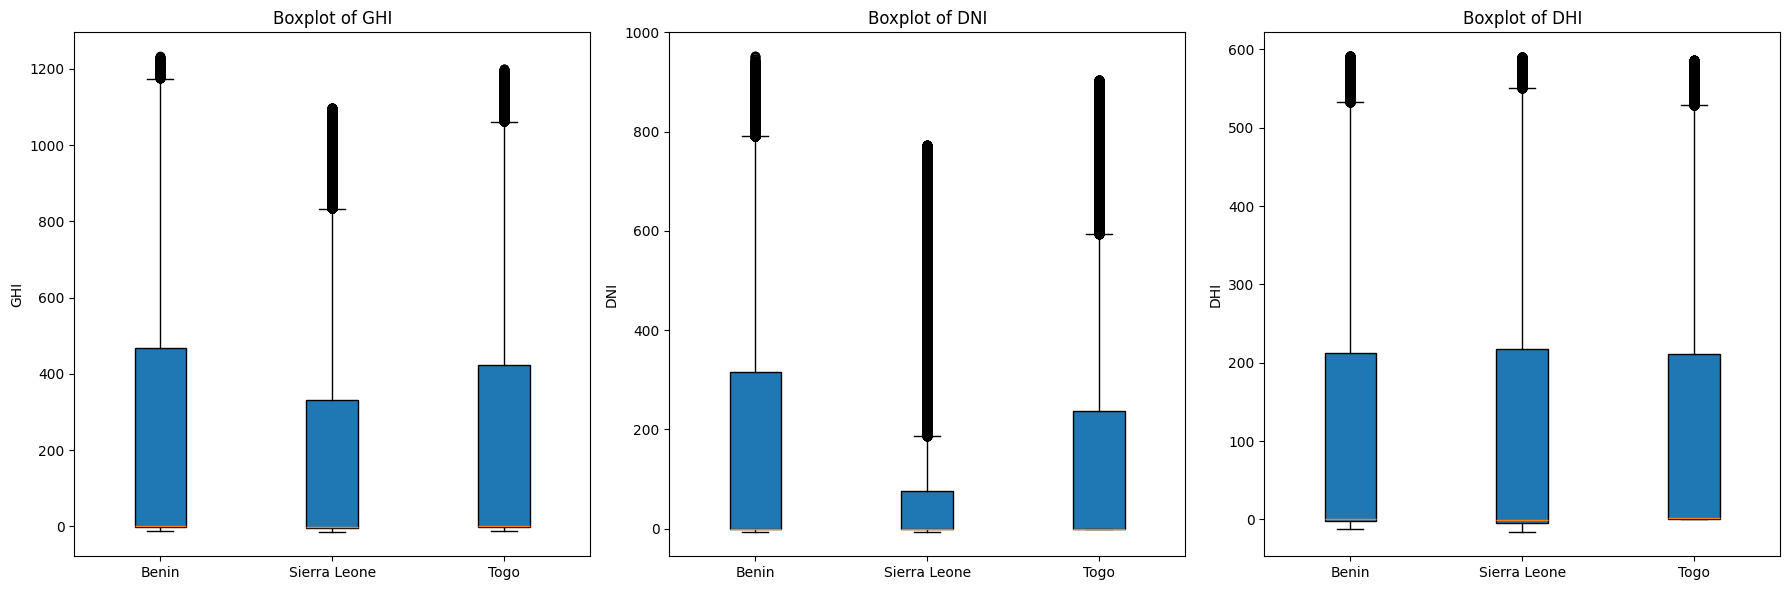

In [11]:
import matplotlib.pyplot as plt

# Prepare data for boxplots
metrics = ['GHI', 'DNI', 'DHI']
country_dfs = {'Benin': benin_df, 'Sierra Leone': sierraleone_df, 'Togo': togo_df}

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for idx, metric in enumerate(metrics):
    data = [df[metric] for df in country_dfs.values()]
    axes[idx].boxplot(data, tick_labels=country_dfs.keys(), patch_artist=True)
    axes[idx].set_title(f'Boxplot of {metric}')
    axes[idx].set_ylabel(metric)
plt.tight_layout()
plt.show()

# Summary table
summary = []
for country, df in country_dfs.items():
    for metric in metrics:
        summary.append({
            'Country': country,
            'Metric': metric,
            'Mean': df[metric].mean(),
            'Median': df[metric].median(),
            'Std': df[metric].std()
        })
summary_df = pd.DataFrame(summary)

# Prepare data for boxplots
metrics = ['GHI', 'DNI', 'DHI']
country_dfs = {'Benin': benin_df, 'Sierra Leone': sierraleone_df, 'Togo': togo_df}

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for idx, metric in enumerate(metrics):
    data = [df[metric] for df in country_dfs.values()]
    axes[idx].boxplot(data, tick_labels=country_dfs.keys(), patch_artist=True)
    axes[idx].set_title(f'Boxplot of {metric}')
    axes[idx].set_ylabel(metric)
plt.tight_layout()
plt.show()

# Summary table
summary = []
for country, df in country_dfs.items():
    for metric in metrics:
        summary.append({
            'Country': country,
            'Metric': metric,
            'Mean': df[metric].mean(),
            'Median': df[metric].median(),
            'Std': df[metric].std()
        })
summary_df = pd.DataFrame(summary)

# Prepare data for boxplots
metrics = ['GHI', 'DNI', 'DHI']
country_dfs = {'Benin': benin_df, 'Sierra Leone': sierraleone_df, 'Togo': togo_df}

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for idx, metric in enumerate(metrics):
    data = [df[metric] for df in country_dfs.values()]
    axes[idx].boxplot(data, tick_labels=country_dfs.keys(), patch_artist=True)
    axes[idx].set_title(f'Boxplot of {metric}')
    axes[idx].set_ylabel(metric)
plt.tight_layout()
plt.show()

# Summary table
summary = []
for country, df in country_dfs.items():
    for metric in metrics:
        summary.append({
            'Country': country,
            'Metric': metric,
            'Mean': df[metric].mean(),
            'Median': df[metric].median(),
            'Std': df[metric].std()
        })
summary_df = pd.DataFrame(summary)

### Statistical Testing

In [12]:
from scipy.stats import f_oneway, kruskal

# Extract GHI values for each country
ghi_benin = benin_df['GHI']
ghi_sierraleone = sierraleone_df['GHI']
ghi_togo = togo_df['GHI']

# One-way ANOVA
anova_stat, anova_p = f_oneway(ghi_benin, ghi_sierraleone, ghi_togo)
print(f"One-way ANOVA p-value: {anova_p:.3e}")

# Kruskal–Wallis test (non-parametric)
kruskal_stat, kruskal_p = kruskal(ghi_benin, ghi_sierraleone, ghi_togo)
print(f"Kruskal–Wallis p-value: {kruskal_p:.3e}")

# Brief note
if anova_p < 0.05:
    print("ANOVA: Significant differences in GHI between countries (p < 0.05).")
else:
    print("ANOVA: No significant differences in GHI between countries (p >= 0.05).")

if kruskal_p < 0.05:
    print("Kruskal–Wallis: Significant differences in GHI between countries (p < 0.05).")
else:
    print("Kruskal–Wallis: No significant differences in GHI between countries (p >= 0.05).")

One-way ANOVA p-value: 0.000e+00
Kruskal–Wallis p-value: 0.000e+00
ANOVA: Significant differences in GHI between countries (p < 0.05).
Kruskal–Wallis: Significant differences in GHI between countries (p < 0.05).


In [ ]:
### Key Observations

In [ ]:
- Benin exhibits the highest mean and median GHI among the three countries, but also shows the greatest variability in solar irradiance metrics.
- Sierra Leone has the lowest mean values for GHI, DNI, and DHI, indicating lower overall solar potential compared to Benin and Togo.
- Togo's solar metrics are intermediate, with median values close to Benin but slightly lower variability, suggesting more consistent solar conditions.

### Visual Summary

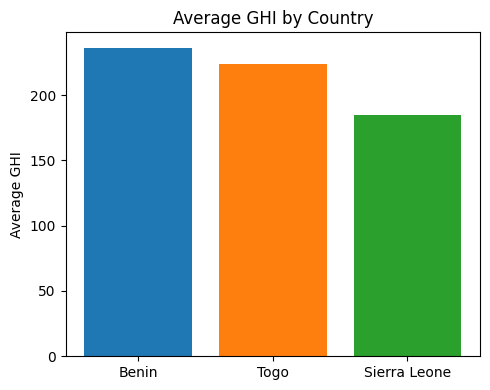

In [13]:
# Bar chart ranking countries by average GHI
avg_ghi = summary_df[summary_df['Metric'] == 'GHI'][['Country', 'Mean']].sort_values('Mean', ascending=False)
plt.figure(figsize=(5, 4))
plt.bar(avg_ghi['Country'], avg_ghi['Mean'], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.ylabel('Average GHI')
plt.title('Average GHI by Country')
plt.tight_layout()
plt.show()